# **Рекуррентный слой в Keras**

Рассмотрим пример, в котором используется слой SimpleRNN и возвращается результат только для последнего временного интервала:

In [1]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN

model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Следующий пример возвращает полную последовательность состояний:


In [2]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
Total params: 322,080
Trainable params: 322,080
Non-trainable params: 0
_________________________________________________________________


Иногда полезно наложить друг на друга несколько рекуррентных слоев, чтобы
увеличить репрезентативность сети. В таких ситуациях все промежуточные слои
должны возвращать полные последовательности результатов:


In [3]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))                          #Последний слой возвращает только последний результат
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


Теперь попробуем применить такую же модель для решения задачи классификации
отзывов к фильмам из набора данных IMDB. Сначала подготовим данные.

In [2]:
# Подготовка данных IMDB

from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 10000
maxlen = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(
                            num_words=max_features)
print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')
print('Pad sequences (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

Loading data...
17473536/17464789 [==============================] - 0s 0us/step
25000 train sequences
25000 test sequences
Pad sequences (samples x time)
input_train shape: (25000, 500)
input_test shape: (25000, 500)


Обучим простую рекуррентную сеть, состоящую из слоев Embedding и SimpleRNN.

In [5]:
# Обучение модели со слоями Embedding и SimpleRNN

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 28s 169ms/step - loss: 0.6231 - acc: 0.6362 - val_loss: 0.4884 - val_acc: 0.7768
Epoch 2/10
157/157 [==============================] - 27s 170ms/step - loss: 0.3831 - acc: 0.8383 - val_loss: 0.4323 - val_acc: 0.8202
Epoch 3/10
157/157 [==============================] - 27s 171ms/step - loss: 0.2920 - acc: 0.8845 - val_loss: 0.3693 - val_acc: 0.8404
Epoch 4/10
157/157 [==============================] - 28s 181ms/step - loss: 0.2187 - acc: 0.9180 - val_loss: 0.3621 - val_acc: 0.8476
Epoch 5/10
157/157 [==============================] - 27s 171ms/step - loss: 0.1559 - acc: 0.9453 - val_loss: 0.3890 - val_acc: 0.8410
Epoch 6/10
157/157 [==============================] - 27s 172ms/step - loss: 0.1054 - acc: 0.9650 - val_loss: 0.4946 - val_acc: 0.8010
Epoch 7/10
157/157 [==============================] - 27s 171ms/step - loss: 0.0683 - acc: 0.9783 - val_loss: 0.4789 - val_acc: 0.8352
Epoch 8/10
157/157 [==============================] - 2

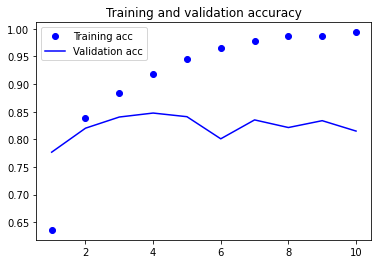

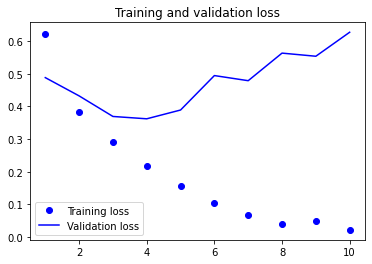

In [6]:
# Вывод результатов

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Пример использования слоя LSTM из Keras**

In [4]:
# Использование слоя LSTM из Keras

from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/10
157/157 [==============================] - 20s 82ms/step - loss: 0.5190 - acc: 0.7497 - val_loss: 0.3631 - val_acc: 0.8390
Epoch 2/10
157/157 [==============================] - 11s 73ms/step - loss: 0.2512 - acc: 0.9031 - val_loss: 0.2892 - val_acc: 0.8840
Epoch 3/10
157/157 [==============================] - 11s 70ms/step - loss: 0.1767 - acc: 0.9396 - val_loss: 0.2983 - val_acc: 0.8878
Epoch 4/10
157/157 [==============================] - 11s 69ms/step - loss: 0.1311 - acc: 0.9556 - val_loss: 0.3202 - val_acc: 0.8670
Epoch 5/10
157/157 [==============================] - 11s 70ms/step - loss: 0.1059 - acc: 0.9668 - val_loss: 0.3514 - val_acc: 0.8812
Epoch 6/10
157/157 [==============================] - 11s 69ms/step - loss: 0.0832 - acc: 0.9736 - val_loss: 0.4079 - val_acc: 0.8730
Epoch 7/10
157/157 [==============================] - 11s 69ms/step - loss: 0.0735 - acc: 0.9770 - val_loss: 0.5125 - val_acc: 0.8692
Epoch 8/10
157/157 [==============================] - 11s 69ms

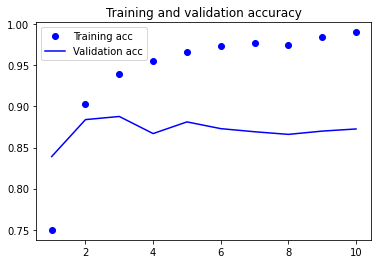

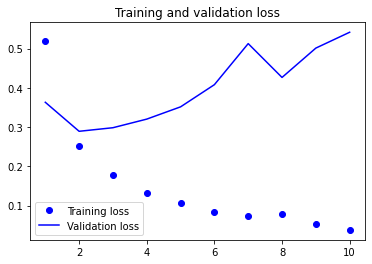

In [5]:
# Вывод результатов

import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()